In [6]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import gc

In [7]:
test_dir = 'C:/Users/Bilal/Desktop/c&d/test'
train_dir = 'C:/Users/Bilal/Desktop/c&d/train'
train_dogs = ['C:/Users/Bilal/Desktop/c&d/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i]
train_cats = ['C:/Users/Bilal/Desktop/c&d/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]
test_imgs = ['C:/Users/Bilal/Desktop/c&d/test/{}'.format(i) for i in os.listdir(test_dir)]
train_imgs = train_dogs[:2000] + train_cats[:2000]
random.shuffle(train_imgs)
del train_dogs
del train_cats
gc.collect() 
#{} is used to inser i from os.listdir() to the given path via format


168

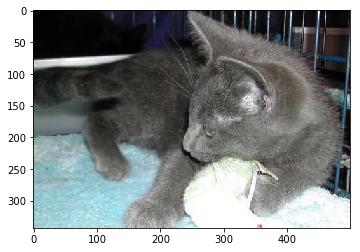

In [9]:

import matplotlib.image as mpimg
for ima in test_imgs[0:3]:
            img = mpimg.imread(ima)
            c= plt.imshow(img)
            #plt.show()
            


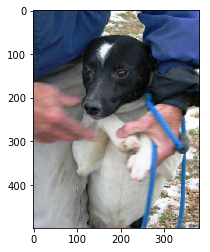

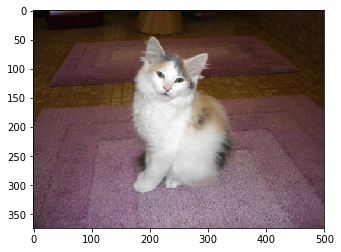

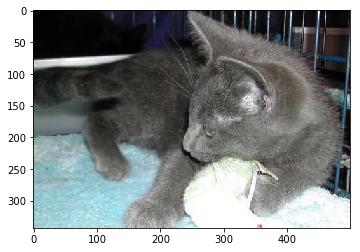

In [4]:
import matplotlib.pyplot as plt
for ima in test_imgs[0:3]:
            img = plt.imread(ima)
            plt.imshow(img)
            plt.show()
            

In [8]:
nrows=150
ncolumns=150
channels =3

In [9]:
def read_and_process_image(list_of_images):
    X=[]
    Y=[]
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR) , (nrows,ncolumns) , interpolation = cv2.INTER_CUBIC))
        if 'dog' in image:
            Y.append(1)
        elif 'cat' in image:
            Y.append(0)
    return X,Y

In [8]:
X ,Y = read_and_process_image(train_imgs)

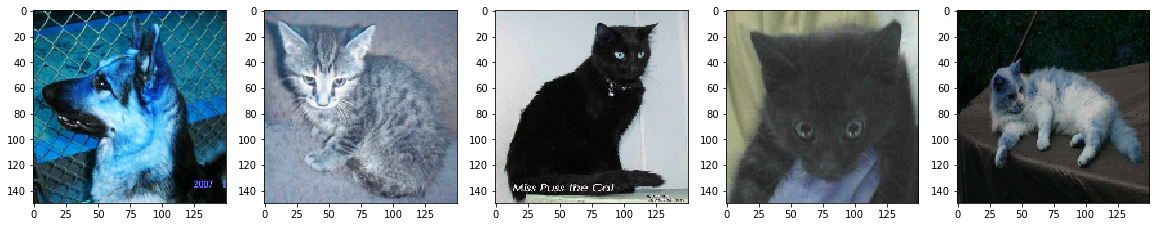

In [13]:
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X[i])

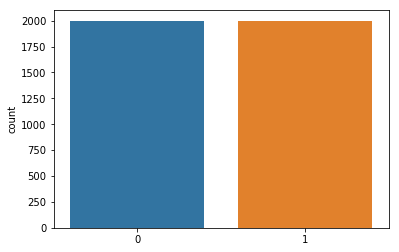

In [9]:
del train_imgs
gc.collect()
import seaborn as sns
X=np.array(X)
Y=np.array(Y)
sns.countplot(Y)

In [10]:
print ('train imgs shape:',X.shape)
print ('train imgs lable:',Y.shape)


train imgs shape: (4000, 150, 150, 3)
train imgs lable: (4000,)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=2)
print ('shape of X_train',X_train.shape)
print ('shape of X_val',X_val.shape)
print ('shape of Y_train',Y_train.shape)
print ('shape of Y_val',Y_val.shape)


shape of X_train (3200, 150, 150, 3)
shape of X_val (800, 150, 150, 3)
shape of Y_train (3200,)
shape of Y_val (800,)


In [11]:
del X
del Y
gc.collect()
ntrain = len(X_train)
nval = len(X_val)
batch_size = 32

In [11]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array , load_img

In [13]:
model=models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation = 'relu' , input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512 , activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [16]:
model.compile(loss = 'binary_crossentropy' , optimizer = optimizers.RMSprop(lr=1e-4) , metrics = ['acc'])

In [14]:
train_datagen = ImageDataGenerator ( rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
val_datagen  = ImageDataGenerator ( rescale = 1./255)

In [15]:
train_generator = train_datagen.flow( X_train , Y_train , batch_size = batch_size)
val_generator = val_datagen.flow( X_val , Y_val , batch_size = batch_size)

In [19]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = ntrain//batch_size,
                             epochs=64,
                             validation_data = val_generator,
                             validation_steps = nval//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/64
100/100 [==============================] - 305s 3s/step - loss: 0.6917 - acc: 0.5281 - val_loss: 0.6965 - val_acc: 0.4975
Epoch 2/64
100/100 [==============================] - 336s 3s/step - loss: 0.6809 - acc: 0.5641 - val_loss: 0.6584 - val_acc: 0.5850
Epoch 3/64
100/100 [==============================] - 309s 3s/step - loss: 0.6617 - acc: 0.5966 - val_loss: 0.6340 - val_acc: 0.6288
Epoch 4/64
100/100 [==============================] - 298s 3s/step - loss: 0.6388 - acc: 0.6397 - val_loss: 0.6029 - val_acc: 0.6800
Epoch 5/64
100/100 [==============================] - 319s 3s/step - loss: 0.6254 - acc: 0.6462 - val_loss: 0.5908 - val_acc: 0.6737
Epoch 6/64
100/100 [==============================] - 314s 3s/step - loss: 0.6051 - acc: 0.6772 - val_loss: 0.5818 - val_acc: 0.7175
Epoch 7/64
100/100 [==============================] - 286s 3s/step - loss: 0.6060 - acc: 0.6641 - val_loss: 0.6006 - val_acc: 0.6713
Epoch 8/64
100/100 [=

In [21]:
#model.save_weights('cats&dogs_weights.h5')
#model.save('cats&dogs.h5')

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , 'b' , label = 'Training accuracy' )
plt.plot(epochs , val_acc , 'r' , label = 'Validation accuracy')
plt.title('Training and Validation accuracy ')
plt.legend()
plt.figure()
plt.plot(epochs , loss , 'b' , label = 'Training loss' )
plt.plot(epochs , val_loss , 'r' , label = 'Validation loss')
plt.title('Training and Validation loss ')
plt.legend()
plt.figure()
#plt.show()



NameError: name 'history' is not defined

In [12]:
X_test , Y_test = read_and_process_image(test_imgs[1:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

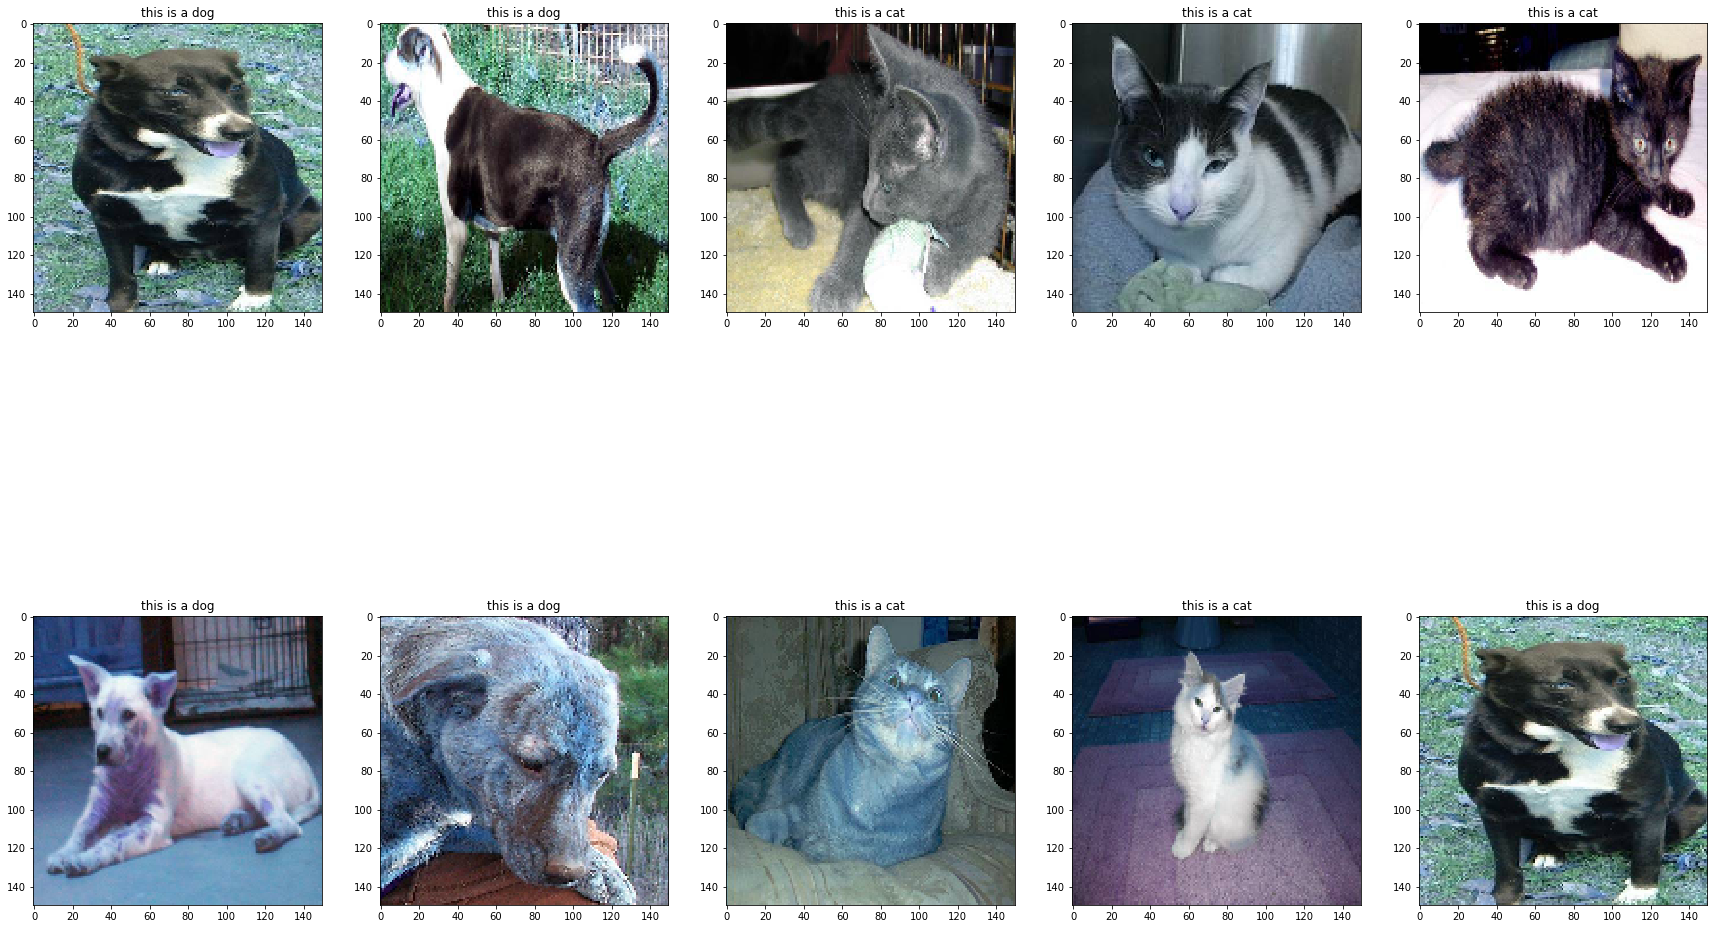

In [14]:
from keras.models import load_model
import matplotlib.pyplot as plt
model=load_model('cats&dogs.h5')
i=0
text_labels=[]
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x , batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5 :
        text_labels.append('dog')
    else :
        text_labels.append ('cat')
    plt.subplot(2,5,i+1)
    plt.title('this is a '+text_labels[i])
    plt.imshow(batch[0])
    i +=1
    if i % 10 == 0:
        break
plt.show()
        
